In [211]:
import pandas as pd
from sklearn import model_selection,metrics,linear_model,neighbors
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [212]:
iris_data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [213]:
def clean_data(data):
    data.loc[data['Species']=='Iris-setosa','Species'] = 0
    data.loc[data['Species']=='Iris-versicolor','Species'] = 1
    data.loc[data['Species']=='Iris-virginica','Species'] = 2
clean_data(iris_data)

In [214]:
X = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris_data['Species']
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.33,random_state = 4)

In [215]:
'''
model knn
'''
k_values = range(1,26)
scores = {}
scoresList = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scoresList.append(metrics.accuracy_score(y_test,y_pred))


In [216]:
scores

{1: 0.96,
 2: 0.96,
 3: 0.98,
 4: 0.98,
 5: 0.98,
 6: 0.98,
 7: 0.98,
 8: 0.98,
 9: 0.98,
 10: 0.98,
 11: 0.98,
 12: 0.98,
 13: 0.98,
 14: 0.98,
 15: 0.98,
 16: 0.98,
 17: 0.98,
 18: 0.98,
 19: 0.98,
 20: 0.98,
 21: 0.98,
 22: 0.98,
 23: 0.98,
 24: 0.98,
 25: 0.98}

Text(0, 0.5, 'predictions')

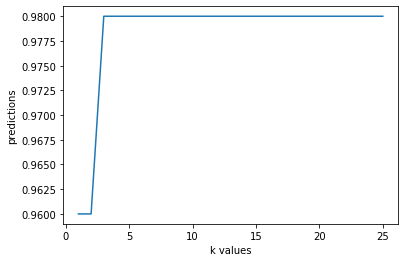

In [217]:
'''
plotting k values with the prediction scores to determine the overfitting and underfitting levels 
'''
plt.plot(krange,scoresList)
plt.xlabel('k values')
plt.ylabel('predictions')
